In [1]:
# 1.Import the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# 3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# 4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_') 

In [8]:
# 5.Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
# 6.Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [10]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
# 7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [12]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [13]:
def differentiate_variables(numerical_df):
    continuous_variables = []
    discrete_variables = []

    for column in numerical_df.columns:
        variable = numerical_df[column]
        if isinstance(variable[0], (int, float)):
            continuous_variables.append(column)
        else:
            discrete_variables.append(column)

    continuous_df = numerical_df[continuous_variables]
    discrete_df = numerical_df[discrete_variables]

    return continuous_df, discrete_df

In [14]:
continuous_df, discrete_df = differentiate_variables(numerical_df)

In [15]:
continuous_df

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


In [16]:
 discrete_df

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [17]:
# 8. Plot a correlation matrix, comment what you see.

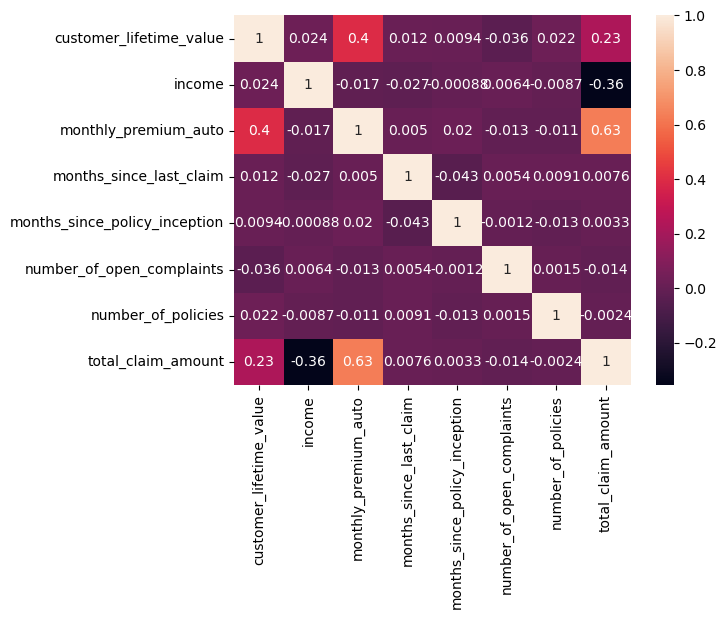

In [18]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [19]:
# There is not multicoloinearity becasuse the scores show not high enough correlation between the variables. 

In [20]:
# 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [21]:
def plot_discrete_variables(discrete_df):
    for col in discrete_df.columns:
        sns.displot(discrete_df[col], kde=False)
        
    return plot_discrete_variables

#plot_discrete_variables(discrete_df)

In [ ]:
# Applying the same def into continuous_df

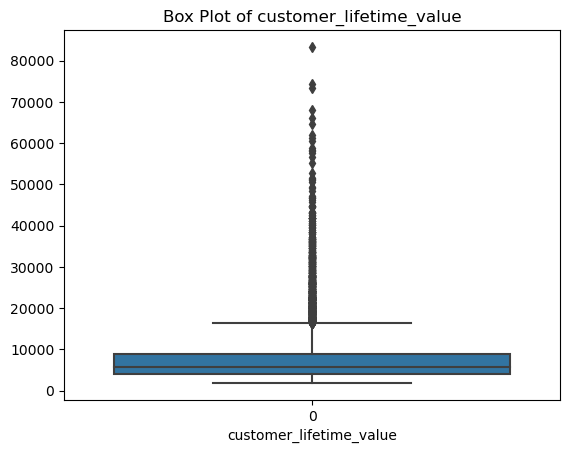

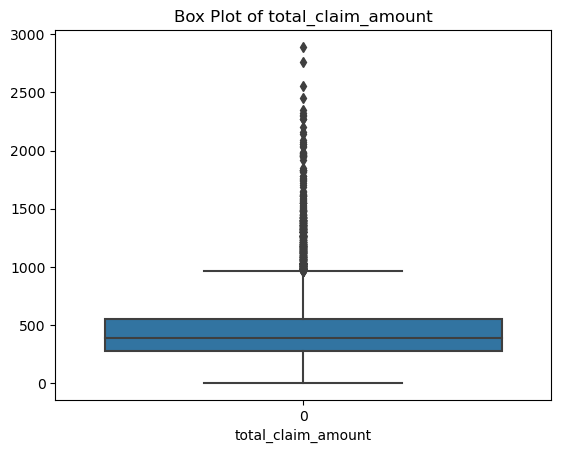

In [22]:
def plot_continuous_variables(continuous_df):
    for col in continuous_df.columns:
        sns.boxplot(data=continuous_df[col])
        plt.title(f"Box Plot of {col}")
        plt.xlabel(col)
        plt.show()

plot_continuous_variables(continuous_df)

In [23]:
# 10. Comment what you can see in the plots. 
# 11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

customer_lifetime_value shows a huge range of data. The most of the data are below 1800, 
however the amount of outliers make the box small in order to the entire grahp.

The second graph total_claim_amount presents similar distribution to the first one.
Here 50% of the data are so concentrate between 300 and 500. 

In [24]:
# 12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [25]:
np.nanpercentile(continuous_df,75)

5780.182197

In [26]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)
print (iqr)

extraordinary_points = [continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed

16414.039911750002
4967.915247000001


1

In [27]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)
print (iqr)

extraordinary_points = [continuous_df['total_claim_amount'] > upper_limit]
len(extraordinary_points)  # This checks the number of points that will be removed

960.3997301249999
275.25659425


1

In [28]:
# We decided to remain the outliers because there are many of them, likely we will need to consider them or explore better in the future. 
# We still don't have enough information to take a decision about that. 

In [29]:
# 13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [30]:
# Comments: It's not nulls values on the numerical data.

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [31]:
# 14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [32]:
numerical_df.to_csv('numerical.csv', index=False)

## Lab | Cleaning categorical data

In [33]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.

In [34]:
categorical_df = customer_df.select_dtypes(object)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
# 3.Check for NaN values and decide what to do with them, do it now.

In [36]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [37]:
# 4.Check all unique values of columns.

In [38]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [39]:
# 5.Check dtypes. Do they all make sense as categorical data?

In [40]:
# There are some variables could be numericals such as dicotomict ones response, gender. They could be transformed into 0 and 1.
#  Besides, renew_offer_type could be trnasformer into 1,2,3 and 4.

In [41]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [42]:
# 6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.
# Yes, some of them. Customer, policy and renew_offer_type.

In [43]:
# There are some alphanumeric values in some columns but we decided to drop just customer due to the amount of unique values.

In [44]:
 def check_categorical_variables(categorical_df):
    for col in categorical_df.columns:
        unique_values = categorical_df[col].unique()
        num_unique_values = len(unique_values)
        data_type = categorical_df[col].dtype

        print(f"Column: {col}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {num_unique_values}")
        print("----------------------")

# Assuming you have a DataFrame named 'data' containing your data
check_categorical_variables(categorical_df)

Column: customer
Data Type: object
Unique Values: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Number of Unique Values: 9134
----------------------
Column: state
Data Type: object
Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Number of Unique Values: 5
----------------------
Column: response
Data Type: object
Unique Values: ['No' 'Yes']
Number of Unique Values: 2
----------------------
Column: coverage
Data Type: object
Unique Values: ['Basic' 'Extended' 'Premium']
Number of Unique Values: 3
----------------------
Column: education
Data Type: object
Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Number of Unique Values: 5
----------------------
Column: employmentstatus
Data Type: object
Unique Values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Number of Unique Values: 5
----------------------
Column: gender
Data Type: object
Unique Values: ['F' 'M']
Number of Unique Values: 2
-------------

In [45]:
categorical_df = categorical_df.drop (['customer'], axis=1)

In [46]:
# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
# we are going to group all the policy in policy type in its column and drop the original policy type column.

# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# policy_type and policy have the same information. Policy type, contained sub categories from policy. 

In [47]:
categorical_df.policy_type.value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [48]:
categorical_df['policy'] = np.where(categorical_df['policy'].isin(['Special L3','Special L2','Special L1']), 'Special', categorical_df['policy'])

In [49]:
categorical_df["policy"] =np.where(categorical_df["policy"].isin(["Corporate L1", "Corporate L2", "Corporate L3"]), "Corporate", categorical_df["policy"])

In [50]:
categorical_df['policy'] = np.where(categorical_df['policy'].isin(['Personal L3','Personal L2','Personal L1']), 'Personal', categorical_df['policy'])

In [51]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal,Offer3,Branch,Four-Door Car,Large


In [52]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding?
# We combined already the columns, policy and policy_type 

# Comment your thoughts and make those changes.

In [53]:
 def check_categorical_variables(categorical_df):
    for col in categorical_df.columns:
        unique_values = categorical_df[col].unique()
        num_unique_values = len(unique_values)
        data_type = categorical_df[col].dtype

        print(f"Column: {col}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {num_unique_values}")
        print("----------------------")

# Assuming you have a DataFrame named 'data' containing your data
check_categorical_variables(categorical_df)

Column: state
Data Type: object
Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Number of Unique Values: 5
----------------------
Column: response
Data Type: object
Unique Values: ['No' 'Yes']
Number of Unique Values: 2
----------------------
Column: coverage
Data Type: object
Unique Values: ['Basic' 'Extended' 'Premium']
Number of Unique Values: 3
----------------------
Column: education
Data Type: object
Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Number of Unique Values: 5
----------------------
Column: employmentstatus
Data Type: object
Unique Values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Number of Unique Values: 5
----------------------
Column: gender
Data Type: object
Unique Values: ['F' 'M']
Number of Unique Values: 2
----------------------
Column: location_code
Data Type: object
Unique Values: ['Suburban' 'Rural' 'Urban']
Number of Unique Values: 3
----------------------
Column: marital_status
Da

In [54]:
# 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

categorical_df.to_csv('categorical.csv', index=False)